In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969932e+07,1.969932e+07,False,NaN,1,NaN,NaN,None,2024-05-17T03:47:00.000Z,65704.878125,2.990861e+10,-28.4668,0.396625,-0.484092,4.584064,2.800205,-3.339586,26.450126,1.294341e+12,54.5729,1.379802e+12,None,2024-05-17T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 11:48:48.908716
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201184e+08,1.201184e+08,True,NaN,2,NaN,NaN,None,2024-05-17T03:46:00.000Z,2950.959006,1.213868e+10,-21.8179,-0.090047,-2.139159,-2.494567,-4.572610,-17.991672,5.748859,3.544645e+11,14.9781,3.544645e+11,None,2024-05-17T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 11:48:48.908716
2,825,Tether USDt,USDT,tether,85731,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T03:46:00.000Z,1.000299,5.841944e+10,-21.8633,0.021263,-0.000801,0.012967,-0.001787,0.093060,-0.010932,1.112388e+11,4.7004,1.131204e+11,None,2024-05-17T03:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 11:48:48.908716
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T03:46:00.000Z,572.170331,1.771710e+09,-11.2277,0.195943,-2.137623,-3.616917,5.674636,1.361416,58.777368,8.444462e+10,3.5682,8.444462e+10,None,2024-05-17T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 11:48:48.908716
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488079e+08,5.761694e+08,True,NaN,5,NaN,NaN,None,2024-05-17T03:46:00.000Z,162.529825,3.128518e+09,-24.8459,1.005078,-0.547585,5.839505,18.530492,-20.348123,48.209348,7.294467e+10,3.0823,9.364472e+10,None,2024-05-17T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 11:48:48.908716
5,3408,USDC,USDC,usd-coin,19165,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331982e+10,3.331982e+10,False,NaN,6,NaN,NaN,None,2024-05-17T03:46:00.000Z,1.000105,6.326597e+09,-26.4294,0.005567,0.009365,-0.009891,0.010221,0.014548,0.016786,3.332333e+10,1.4081,3.332333e+10,None,2024-05-17T03:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 11:48:48.908716
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T03:47:00.000Z,0.516457,1.089853e+09,-7.3883,-0.173881,-0.338582,-0.120590,3.775927,-16.910682,-7.731352,2.855439e+10,1.2039,5.164574e+10,None,2024-05-17T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 11:48:48.908716
7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474206e+09,5.106690e+09,True,NaN,8,3.414167e+09,2.302633e+10,None,2024-05-17T03:46:00.000Z,6.744348,8.485221e+08,135.0480,0.890997,-3.599257,4.984186,4.836101,68.807686,215.543811,2.343126e+10,0.9901,3.444129e+10,None,2024-05-17T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 11:48:48.908716
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [12]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
        
    if not os.path.isfile(r'C:\Users\Nitro 5\OneDrive\Desktop\Data Analyst\Python\Web Scraping\Automating Crypto Website API\API.csv'):
        df.to_csv(r'C:\Users\Nitro 5\OneDrive\Desktop\Data Analyst\Python\Web Scraping\Automating Crypto Website API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Nitro 5\OneDrive\Desktop\Data Analyst\Python\Web Scraping\Automating Crypto Website API\API.csv', mode = 'a', header = False)
    
# If that didn't work try using the local host URL as shown in the video

In [13]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [14]:
df69 = pd.read_csv(r'C:\Users\Nitro 5\OneDrive\Desktop\Data Analyst\Python\Web Scraping\Automating Crypto Website API\API.csv')
df69

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969938e+07,1.969938e+07,False,NaN,1,NaN,NaN,NaN,2024-05-17T04:26:00.000Z,65568.938144,2.990308e+10,-28.5837,0.177511,-0.545584,4.101821,2.856510,-3.568438,26.086099,1.291667e+12,54.5867,1.376948e+12,NaN,2024-05-17T04:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:27:31.259478
1,1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,NaN,2024-05-17T04:25:00.000Z,2956.530264,1.215357e+10,-21.8947,0.204461,-1.811435,-2.450513,-4.389752,-17.594202,5.875323,3.551393e+11,15.0084,3.551393e+11,NaN,2024-05-17T04:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:27:31.259478
2,2,825,Tether USDt,USDT,tether,85731,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-17T04:25:00.000Z,1.000153,5.839604e+10,-22.3113,0.010255,-0.011126,0.020078,-0.005178,0.065576,-0.003626,1.112225e+11,4.7003,1.141040e+11,NaN,2024-05-17T04:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 12:27:31.259478
3,3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,NaN,2024-05-17T04:25:00.000Z,571.629567,1.745882e+09,-13.5124,0.303346,-2.049364,-3.722418,5.641309,1.715924,58.556504,8.436480e+10,3.5653,8.436480e+10,NaN,2024-05-17T04:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:27:31.259478
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.488067e+08,5.761689e+08,True,NaN,5,NaN,NaN,NaN,2024-05-17T04:25:00.000Z,162.352668,3.111858e+09,-25.7461,1.030181,-0.551022,5.234138,18.246000,-19.858994,47.972471,7.286496e+10,3.0793,9.354256e+10,NaN,2024-05-17T04:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:27:31.259478
5,5,3408,USDC,USDC,usd-coin,19165,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.330974e+10,3.330974e+10,False,NaN,6,NaN,NaN,NaN,2024-05-17T04:25:00.000Z,1.000077,6.347768e+09,-26.2698,0.009736,0.007854,-0.002975,0.007345,0.009589,0.036848,3.331232e+10,1.4078,3.331232e+10,NaN,2024-05-17T04:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 12:27:31.259478
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,NaN,2024-05-17T04:26:00.000Z,0.517125,1.093469e+09,-7.3914,0.078863,-0.125347,-0.215887,4.175782,-16.450372,-7.557563,2.859130e+10,1.2083,5.171251e+10,NaN,2024-05-17T04:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:27:31.259478
7,7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.474206e+09,5.106690e+09,True,NaN,8,3.414167e+09,2.283102e+10,NaN,2024-05-17T04:25:00.000Z,6.687144,8.411031e+08,130.2905,-0.554102,-3.479174,3.816471,4.518232,70.841196,213.128596,2.323252e+10,0.9818,3.414917e+10,NaN,2024-05-17T04:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:27:31.259478
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'med

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969938e+07,1.969938e+07,False,NaN,1,NaN,NaN,None,2024-05-17T04:18:00.000Z,65587.487580,2.993017e+10,-28.4199,0.246085,-0.549653,4.351157,2.906246,-3.103502,26.190297,1.292033e+12,54.5859,1.377337e+12,None,2024-05-17T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:19:30.396511
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,None,2024-05-17T04:17:00.000Z,2953.480447,1.214304e+10,-21.9002,0.043588,-1.965256,-2.421818,-4.419696,-17.515096,5.796705,3.547730e+11,14.9885,3.547730e+11,None,2024-05-17T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:19:30.396511
2,825,Tether USDt,USDT,tether,85731,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T04:17:00.000Z,1.000217,5.841528e+10,-22.1829,0.006559,-0.008504,0.032080,-0.030293,0.063655,-0.020947,1.112296e+11,4.6992,1.141113e+11,None,2024-05-17T04:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 12:19:30.396511
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T04:17:00.000Z,571.525746,1.747703e+09,-13.6095,0.286848,-2.100366,-3.598304,5.479869,2.018167,58.495011,8.434948e+10,3.5636,8.434948e+10,None,2024-05-17T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:19:30.396511
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488067e+08,5.761689e+08,True,NaN,5,NaN,NaN,None,2024-05-17T04:17:00.000Z,162.246711,3.115223e+09,-25.5244,1.185914,-0.254766,5.251168,17.938490,-19.254875,48.180736,7.281741e+10,3.0764,9.348151e+10,None,2024-05-17T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:19:30.396511
5,3408,USDC,USDC,usd-coin,19165,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.330974e+10,3.330974e+10,False,NaN,6,NaN,NaN,None,2024-05-17T04:17:00.000Z,1.000114,6.327769e+09,-26.5165,0.007029,0.019824,0.020873,-0.016427,0.004771,0.013230,3.331355e+10,1.4074,3.331355e+10,None,2024-05-17T04:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 12:19:30.396511
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T04:18:00.000Z,0.516378,1.092729e+09,-7.2551,-0.077284,-0.236511,-0.232023,3.757632,-16.296492,-7.665658,2.855002e+10,1.2062,5.163784e+10,None,2024-05-17T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:19:30.396511
7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474206e+09,5.106690e+09,True,NaN,8,3.414167e+09,2.286384e+10,None,2024-05-17T04:17:00.000Z,6.696755,8.410234e+08,130.6296,-0.313723,-3.648063,3.978543,4.484950,70.768234,213.756740,2.326591e+10,0.9829,3.419825e+10,None,2024-05-17T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:19:30.396511
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19699375.00000,19699375.00000,False,NaN,1,NaN,NaN,None,2024-05-17T04:27:00.000Z,65569.76009,29903910827.52604,-28.58540,0.13310,-0.52584,4.08475,2.85097,-3.55001,26.09725,1291683292758.37744,54.56220,1376964961981.07007,None,2024-05-17T04:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:28:32.726479
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120120311.41094,120120311.41094,True,NaN,2,NaN,NaN,None,2024-05-17T04:26:00.000Z,2954.94398,12156084592.99152,-21.88640,0.12878,-1.88434,-2.55154,-4.37880,-17.77282,5.80762,354948791636.57153,15.00040,354948791636.57001,None,2024-05-17T04:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:28:32.726479
2,825,Tether USDt,USDT,tether,85731,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111205483123.85364,114086550454.42137,True,NaN,3,NaN,NaN,None,2024-05-17T04:26:00.000Z,1.00023,58383225281.87194,-22.34070,0.01860,-0.00630,0.03665,-0.00051,0.02811,-0.00238,111230511643.65816,4.70070,114112227403.14000,None,2024-05-17T04:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 12:28:32.726479
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586492.29966,147586492.29966,False,NaN,4,NaN,NaN,None,2024-05-17T04:26:00.000Z,571.53734,1745057205.21153,-13.56290,0.29459,-2.07064,-3.76841,5.63055,1.59653,58.55994,84351191602.31674,3.56470,84351191602.32001,None,2024-05-17T04:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:28:32.726479
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448806671.95802,576168911.77047,True,NaN,5,NaN,NaN,None,2024-05-17T04:26:00.000Z,162.40724,3112181550.84284,-25.76370,1.05159,-0.49906,5.27380,18.32547,-19.86769,47.99885,72889453640.58394,3.08040,93574003702.80000,None,2024-05-17T04:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:28:32.726479
5,3408,USDC,USDC,usd-coin,19165,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33309744659.52716,33309744659.52716,False,NaN,6,NaN,NaN,None,2024-05-17T04:26:00.000Z,1.00012,6344768490.65727,-26.36290,0.01485,0.01304,0.01741,0.01084,0.01918,0.02600,33313634829.91949,1.40790,33313634829.92000,None,2024-05-17T04:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 12:28:32.726479
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,None,2024-05-17T04:27:00.000Z,0.51710,1093843506.78421,-7.36680,0.06749,-0.10892,-0.22108,4.17023,-16.45647,-7.56146,28590163455.95713,1.20770,51710446500.45000,None,2024-05-17T04:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 12:28:32.726479
7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474206415.21630,5106689778.61973,True,NaN,8,3414166606.00000,22832505912.48539,None,2024-05-17T04:26:00.000Z,6.68758,841000665.68980,130.24690,-0.56428,-3.43358,3.77709,4.54737,70.87082,213.14610,23234026827.28389,0.98190,34151386859.29000,None,2024-05-1

In [17]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13310,-0.52584,4.08475,2.85097,-3.55001,26.09725
Ethereum,0.12878,-1.88434,-2.55154,-4.37880,-17.77282,5.80762
Tether USDt,0.01860,-0.00630,0.03665,-0.00051,0.02811,-0.00238
BNB,0.29459,-2.07064,-3.76841,5.63055,1.59653,58.55994
Solana,1.05159,-0.49906,5.27380,18.32547,-19.86769,47.99885
USDC,0.01485,0.01304,0.01741,0.01084,0.01918,0.02600
XRP,0.06749,-0.10892,-0.22108,4.17023,-16.45647,-7.56146
Toncoin,-0.56428,-3.43358,3.77709,4.54737,70.87082,213.14610
Dogecoin,0.30137,-4.28150,-0.73865,-3.57406,0.05106,76.57233


In [18]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.13310
             quote.USD.percent_change_24h    -0.52584
             quote.USD.percent_change_7d      4.08475
             quote.USD.percent_change_30d     2.85097
             quote.USD.percent_change_60d    -3.55001
             quote.USD.percent_change_90d    26.09725
Ethereum     quote.USD.percent_change_1h      0.12878
             quote.USD.percent_change_24h    -1.88434
             quote.USD.percent_change_7d     -2.55154
             quote.USD.percent_change_30d    -4.37880
             quote.USD.percent_change_60d   -17.77282
             quote.USD.percent_change_90d     5.80762
Tether USDt  quote.USD.percent_change_1h      0.01860
             quote.USD.percent_change_24h    -0.00630
             quote.USD.percent_change_7d      0.03665
             quote.USD.percent_change_30d    -0.00051
             quote.USD.percent_change_60d     0.02811
             quote.USD.percent_change_90

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.13310
            quote.USD.percent_change_24h  -0.52584
            quote.USD.percent_change_7d    4.08475
            quote.USD.percent_change_30d   2.85097
            quote.USD.percent_change_60d  -3.55001
            quote.USD.percent_change_90d  26.09725
Ethereum    quote.USD.percent_change_1h    0.12878
            quote.USD.percent_change_24h  -1.88434
            quote.USD.percent_change_7d   -2.55154
            quote.USD.percent_change_30d  -4.37880
            quote.USD.percent_change_60d -17.77282
            quote.USD.percent_change_90d   5.80762
Tether USDt quote.USD.percent_change_1h    0.01860
            quote.USD.percent_change_24h  -0.00630
            quote.USD.percent_change_7d    0.03665
            quote.USD.percent_change_30d  -0.00051
            quote.USD.percent_change_60d   0.02811
            quote.USD.percent_change_90d  -0.00238
BNB         quote.USD.percent_change_1h    0.29459
            quote.USD.percent_change_24h  -2.07064
            quote.USD.percent_change_7d   -3.76841
            quote.USD.percent_change_30d   5.63055
            quote.USD.percent_change_60d   1.59653
            quote.USD.percent_change_90d  58.55994
Solana      quote.USD.percent_change_1h    1.05159
            quote.USD.percent_change_24h  -0.49906
            quote.USD.percent_change_7d    5.27380
            quote.USD.percent_change_30d  18.32547
            quote.USD.percent_change_60d -19.86769
            quote.USD.percent_change_90d  47.99885
USDC        quote.USD.percent_change_1h    0.01485
            quote.USD.percent_change_24h   0.01304
            quote.USD.percent_change_7d    0.01741
            quote.USD.percent_change_30d   0.01084
            quote.USD.percent_change_60d   0.01918
            quote.USD.percent_change_90d   0.02600
XRP         quote.USD.percent_change_1h    0.06749
            quote.USD.percent_change_24h  -0.10892
            quote.USD.percent_change_7d   -0.22108
            quote.USD.percent_change_30d   4.17023
            quote.USD.percent_change_60d -16.45647
            quote.USD.percent_change_90d  -7.56146
Toncoin     quote.USD.percent_change_1h   -0.56428
            quote.USD.percent_change_24h  -3.43358
            quote.USD.percent_change_7d    3.77709
            quote.USD.percent_change_30d   4.54737
            quote.USD.percent_change_60d  70.87082
            quote.USD.percent_change_90d 213.14610
Dogecoin    quote.USD.percent_change_1h    0.30137
            quote.USD.percent_change_24h  -4.28150
            quote.USD.percent_change_7d   -0.73865
            quote.USD.percent_change_30d  -3.57406
            quote.USD.percent_change_60d   0.05106
            quote.USD.percent_change_90d  76.57233
Cardano     quote.USD.percent_change_1h    0.39234
            quote.USD.percent_change_24h   0.57894
            quote.USD.percent_change_7d   -1.22849
            quote.USD.percent_change_30d   0.97873
            quote.USD.percent_change_60d -30.94527
            quote.USD.percent_change_90d -22.13955
Shiba Inu   quote.USD.percent_change_1h    0.32014
            quote.USD.percent_change_24h  -2.45655
            quote.USD.percent_change_7d    4.31631
            quote.USD.percent_change_30d   8.15506
            quote.USD.percent_change_60d -14.16298
            quote.USD.percent_change_90d 150.53122
Avalanche   quote.USD.percent_change_1h    0.75932
            quote.USD.percent_change_24h  -0.19800
            quote.USD.percent_change_7d   -2.26865
            quote.USD.percent_change_30d   0.66975
            quote.USD.percent_change_60d -42.07918
            quote.USD.percent_change_90d -13.48713
TRON        quote.USD.percent_change_1h   -0.20203
            quote.USD.percent_change_24h  -0.20753
            quote.USD.percent_change_7d   -1.87199
            quote.USD.percent_change_30d  10.33110
            quote.USD.percent_change_60d  -1.43923
            quo

In [21]:
df5.count()

values    90
dtype: int64

In [28]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13310
1,Bitcoin,quote.USD.percent_change_24h,-0.52584
2,Bitcoin,quote.USD.percent_change_7d,4.08475
3,Bitcoin,quote.USD.percent_change_30d,2.85097
4,Bitcoin,quote.USD.percent_change_60d,-3.55001
5,Bitcoin,quote.USD.percent_change_90d,26.09725
6,Ethereum,quote.USD.percent_change_1h,0.12878
7,Ethereum,quote.USD.percent_change_24h,-1.88434
8,Ethereum,quote.USD.percent_change_7d,-2.55154
9,Ethereum,quote.USD.percent_change_30d,-4.37880


In [30]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13310
1,Bitcoin,quote.USD.percent_change_24h,-0.52584
2,Bitcoin,quote.USD.percent_change_7d,4.08475
3,Bitcoin,quote.USD.percent_change_30d,2.85097
4,Bitcoin,quote.USD.percent_change_60d,-3.55001
5,Bitcoin,quote.USD.percent_change_90d,26.09725
6,Ethereum,quote.USD.percent_change_1h,0.12878
7,Ethereum,quote.USD.percent_change_24h,-1.88434
8,Ethereum,quote.USD.percent_change_7d,-2.55154
9,Ethereum,quote.USD.percent_change_30d,-4.37880


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

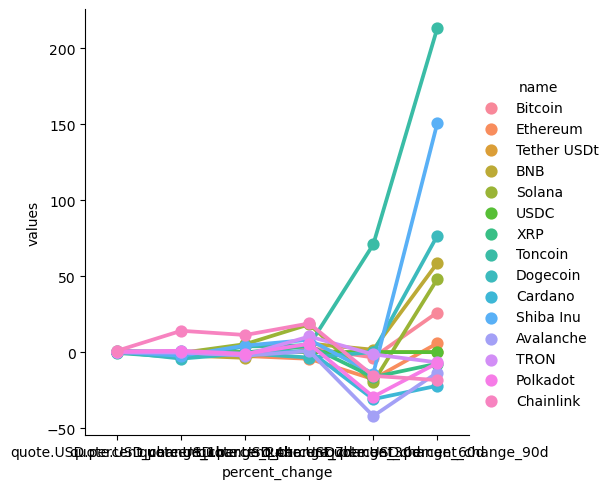

In [32]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [36]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.13310
1,Bitcoin,24h,-0.52584
2,Bitcoin,7d,4.08475
3,Bitcoin,30d,2.85097
4,Bitcoin,60d,-3.55001
5,Bitcoin,90d,26.09725
6,Ethereum,1h,0.12878
7,Ethereum,24h,-1.88434
8,Ethereum,7d,-2.55154
9,Ethereum,30d,-4.37880


In [48]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
#df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,65569.76009,2024-05-17 12:28:32.726479
1,Ethereum,2954.94398,2024-05-17 12:28:32.726479
2,Tether USDt,1.00023,2024-05-17 12:28:32.726479
3,BNB,571.53734,2024-05-17 12:28:32.726479
4,Solana,162.40724,2024-05-17 12:28:32.726479
5,USDC,1.00012,2024-05-17 12:28:32.726479
6,XRP,0.51710,2024-05-17 12:28:32.726479
7,Toncoin,6.68758,2024-05-17 12:28:32.726479
8,Dogecoin,0.15041,2024-05-17 12:28:32.726479
9,Cardano,0.46150,2024-05-17 12:28:32.726479


C:\Users\Nitro 5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nitro 5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

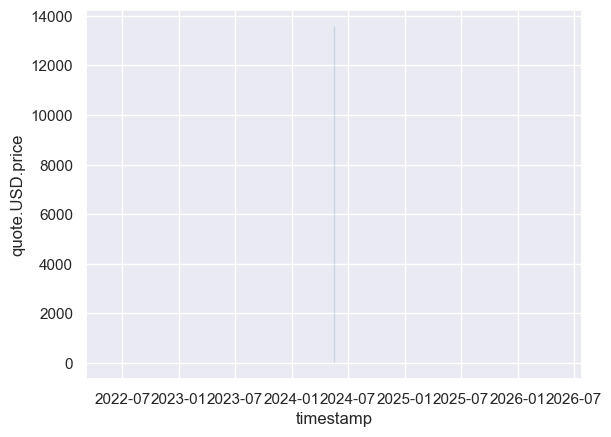

In [46]:
#sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)